In [1]:
import numpy as np
import pyvisa
import matplotlib.pyplot as plt
import pandas as pd
import struct

In [5]:
rm = pyvisa.ResourceManager()
print(rm.list_resources())
my_inst = rm.open_resource('GPIB0::16::INSTR')
my_inst = rm.close()


('ASRL1::INSTR', 'ASRL10::INSTR', 'GPIB0::16::INSTR', 'GPIB0::17::INSTR')


In [4]:
my_inst.read_termination = '\n'
my_inst.write_termination = '\n'
my_inst.write('CHAN2')
my_inst.write('EMIB')
my_inst.query('IDN?')
#my_inst.read()

'HEWLETT PACKARD,8753E,0,7.48'

In [5]:
my_inst.write('FORM2;')        #outputs number in 4bytes mode (float?) with 4-byte header

my_inst.write('S21;')
my_inst.write('STAR 3 GHZ;')       #set start frequency
my_inst.write('STOP 6 GHZ;')        #set stop frequency

12

Proviamo a salvare sul pc i grafici

In [6]:
#my_inst.write('LOGM')
#my_inst.write('PLOT')
#my_inst.query('PDATAON?')
#my_inst.query('TITP?')
#my_inst.write('PLTPRTHPIB')
#my_inst.write('STORSEQn')



9

Codice seguente per leggere un valore dal grafico

In [7]:
my_inst.write('MARK1')
my_inst.write('SEAMAX?')
my_inst.query('OUTPMARK')

' -1.285239E+00, -1.454520E+01,   4.077074941E+09'

In [37]:
my_inst.write('POIN?')
num_points = int(float(my_inst.read('\n')))
print(num_points)

1601


lunghezza q  3202
lunghezza i  3202
lunghezza q  1601
lunghezza i  1601


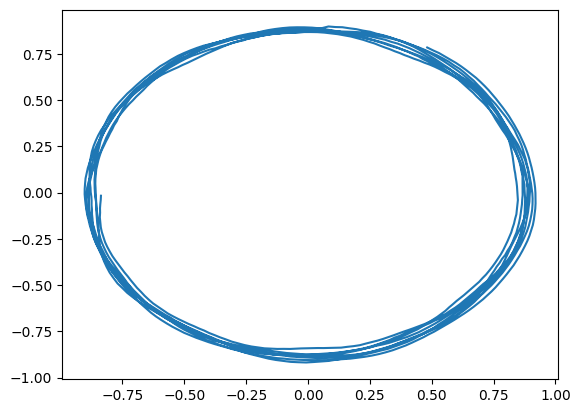

In [38]:
my_inst.write('POLA')
my_inst.write('DISPDATA;OUTPFORM')
num_bytes = 8*int(num_points)+4
raw_bytes = my_inst.read_bytes(num_bytes)

trimmed_bytes = raw_bytes[4:]
tipo='>'+str(2*num_points)+'f'
x = struct.unpack(tipo, trimmed_bytes)

amp_q = list(x)
amp_i = amp_q.copy()

print('lunghezza q ', len(amp_q))
print('lunghezza i ', len(amp_i))

del amp_i[1::2]
del amp_q[0::2]

print('lunghezza q ', len(amp_q))
print('lunghezza i ', len(amp_i))

plt.plot(amp_i, amp_q)

In [22]:
my_inst.write('DISPDATA;OUTPFORM')
num_bytes = 8*int(num_points)+4
raw_bytes = my_inst.read_bytes(num_bytes)

trimmed_bytes = raw_bytes[4:]
tipo='>'+str(2*num_points)+'f'
x = struct.unpack(tipo, trimmed_bytes)

amp_q = list(x)
amp_i = amp_q.copy()

del amp_i[1::2]
del amp_q[0::2]

In [26]:
my_inst.write('STAR?')
start = float(my_inst.read('\n'))
my_inst.write('STOP?')
stop = float(my_inst.read('\n'))

freq = list(np.linspace(start, stop, num_points))
del freq[0]

zipped_data = zip(freq, amp_i, amp_q)

plt.plot(freq,amp_i[1:])


AttributeError: module 'matplotlib' has no attribute 'plot'